## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [4]:
mses = {'LinReg' : 0, 'SVR': 0, 'DTR':0, 'RFR':0, 'KNNR':0}
r2s = {'LinReg' : 0, 'SVR': 0, 'DTR':0, 'RFR':0, 'KNNR':0}

## Importing the Data

In [5]:
dataset = pd.read_excel('Concrete_Data.xls')
dataset.shape

(1030, 9)

In [6]:
dataset.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Create X and Y

In [7]:
X = dataset.iloc[:, 0:8].values
Y = dataset.iloc[:, 8].values

In [8]:
X.shape

(1030, 8)

In [9]:
Y.shape

(1030,)

In [10]:
X

array([[  540. ,     0. ,     0. , ...,  1040. ,   676. ,    28. ],
       [  540. ,     0. ,     0. , ...,  1055. ,   676. ,    28. ],
       [  332.5,   142.5,     0. , ...,   932. ,   594. ,   270. ],
       ..., 
       [  148.5,   139.4,   108.6, ...,   892.4,   780. ,    28. ],
       [  159.1,   186.7,     0. , ...,   989.6,   788.9,    28. ],
       [  260.9,   100.5,    78.3, ...,   864.5,   761.5,    28. ]])

In [11]:
Y

array([ 79.98611076,  61.88736576,  40.26953526, ...,  23.69660064,
        32.76803638,  32.40123514])

## Preprocess the Data

In [12]:
sc_X = StandardScaler()

In [13]:
X = sc_X.fit_transform(X)

In [14]:
X

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ..., 
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

## Create Train and Test Data

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [16]:
X_train.shape

(824, 8)

In [17]:
X_test.shape

(206, 8)

In [18]:
Y_train.shape

(824,)

In [19]:
Y_test.shape

(206,)

## Linear Regression

In [20]:
reg_lin = LinearRegression()

In [21]:
reg_lin.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
Y_pred_lin = reg_lin.predict(X_test)

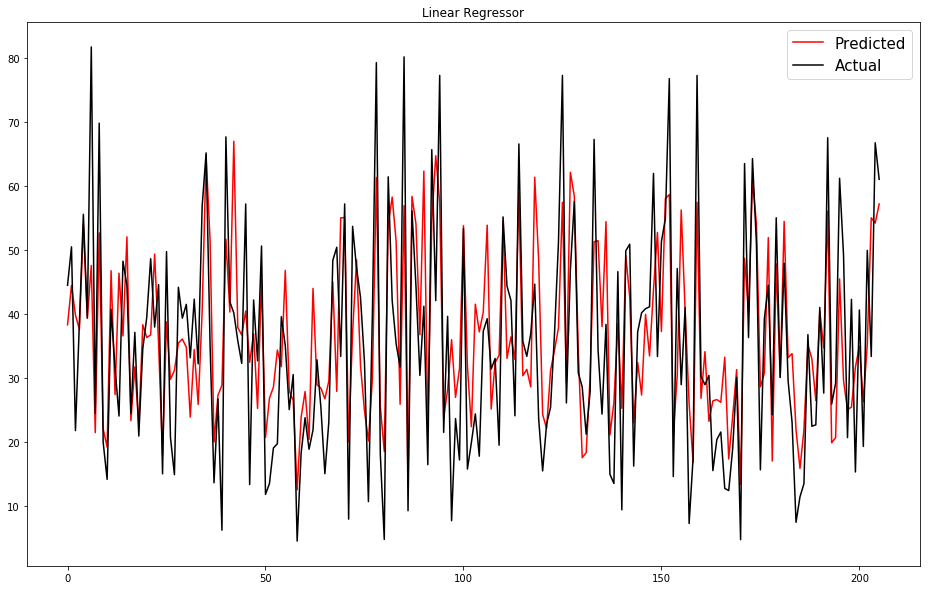

In [24]:
plt.figure(figsize = (16,10))
plt.plot(Y_pred_lin, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('Linear Regressor')
plt.show()

## SVR

In [25]:
reg_lsvr = SVR(kernel = 'linear')

In [26]:
reg_lsvr.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
Y_pred_lsvr = reg_lsvr.predict(X_test)

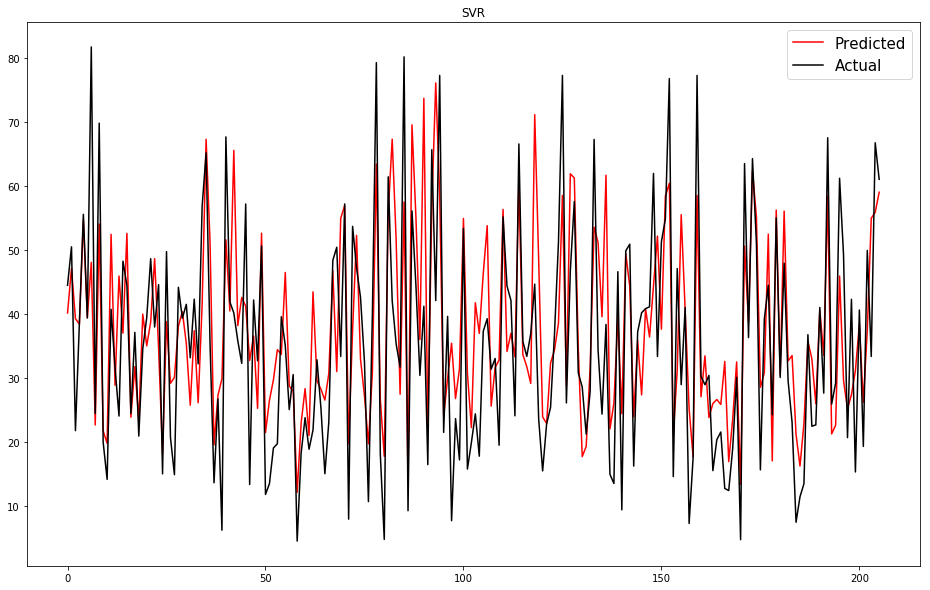

In [28]:
plt.figure(figsize = (16,10))
plt.plot(Y_pred_lsvr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('SVR')
plt.show()

## Decision Tree Regressor

In [29]:
reg_dtr = DecisionTreeRegressor()

In [30]:
reg_dtr.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
Y_pred_dtr = reg_dtr.predict(X_test)

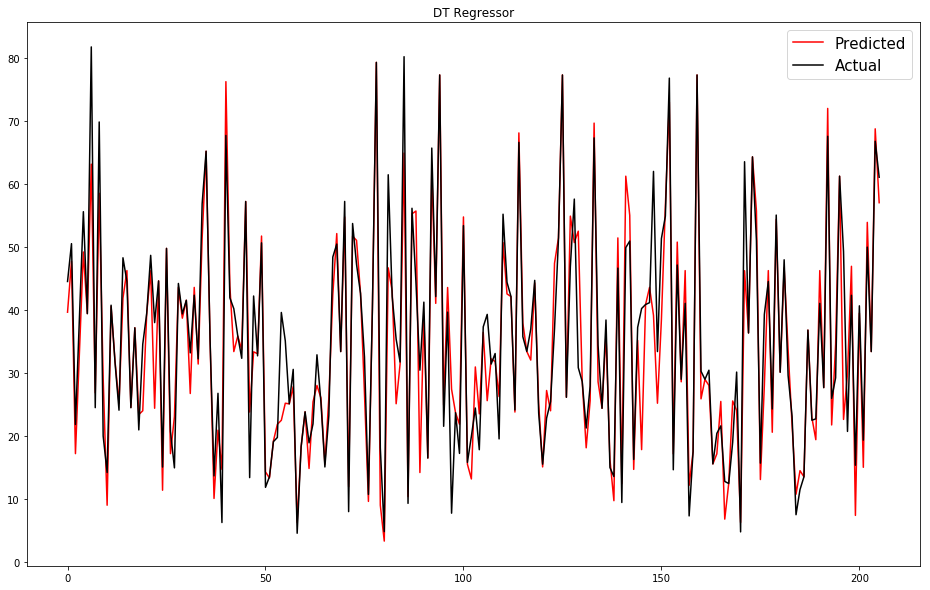

In [32]:
plt.figure(figsize = (16,10))
plt.plot(Y_pred_dtr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('DT Regressor')
plt.show()

## Random Forest Regressor

In [33]:
reg_rfr = RandomForestRegressor(n_estimators=200)

In [34]:
reg_rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [35]:
Y_pred_rfr = reg_rfr.predict(X_test)

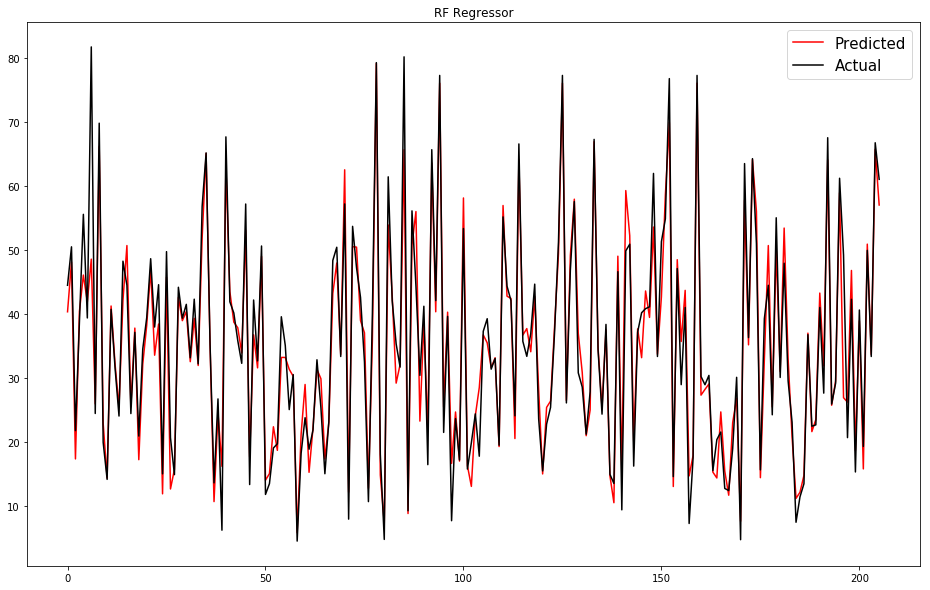

In [36]:
plt.figure(figsize = (16,10))
plt.plot(Y_pred_rfr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('RF Regressor')
plt.show()

## KNN Regressor

In [37]:
reg_knnr = KNeighborsRegressor(n_neighbors = 2)

In [38]:
reg_knnr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [39]:
Y_pred_knnr = reg_knnr.predict(X_test)

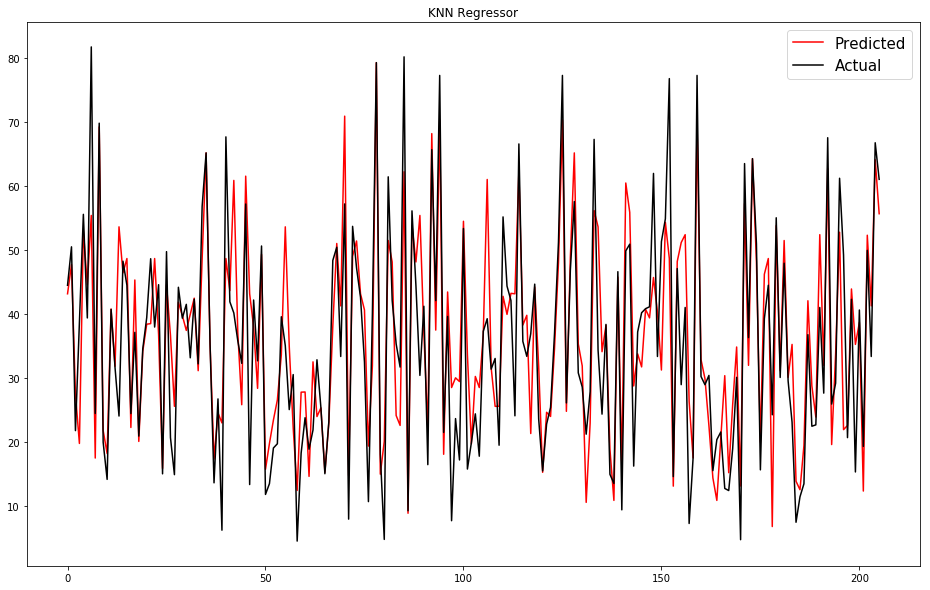

In [40]:
plt.figure(figsize = (16,10))
plt.plot(Y_pred_knnr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('KNN Regressor')
plt.show()

## Metrics

In [41]:
mses['LinReg'] = mean_squared_error(Y_pred_lin, Y_test)
mses['SVR'] = mean_squared_error(Y_pred_lsvr, Y_test)
mses['DTR'] = mean_squared_error(Y_pred_dtr, Y_test)
mses['RFR'] = mean_squared_error(Y_pred_rfr, Y_test)
mses['KNNR'] = mean_squared_error(Y_pred_knnr, Y_test)
mses

{'DTR': 39.798644171411951,
 'KNNR': 86.876869110072718,
 'LinReg': 134.86114722862223,
 'RFR': 22.437609486390681,
 'SVR': 138.24967886333977}

In [42]:
r2s['LinReg'] = r2_score(Y_pred_lin, Y_test)
r2s['SVR'] = r2_score(Y_pred_lsvr, Y_test)
r2s['DTR'] = r2_score(Y_pred_dtr, Y_test)
r2s['RFR'] = r2_score(Y_pred_rfr, Y_test)
r2s['KNNR'] = r2_score(Y_pred_knnr, Y_test)
r2s

{'DTR': 0.86158245581162984,
 'KNNR': 0.6302656906415951,
 'LinReg': 0.18890265813870277,
 'RFR': 0.91355609178157149,
 'SVR': 0.27676912792438246}